In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# ML functions and plotting libraries
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error

In [8]:
# file naming variables
latest_version = 'df_2022-10-29'
location = '/Users/Sim/Documents/Other/Programming/Personal Projects/House price prediction'

### Loading data

In [22]:
df=pd.read_csv(f'{location}/{latest_version}.csv')
len(df)

2378

In [10]:
df.tail(5)

,Unnamed: 0,Date,Price,NearStat,StatDist(miles),Prop_Type,Bedrooms,Bathrooms,Floor_Size,Outdoor,Portered,Contract_Type,Outcode,Outcode2,Postcode,Centrality,North,Links,Date_Scraped
2373,108,20221027.0,650000.0,Finchley Road & Frognal Station,0.4,Apartment,2.0,1.0,NaN,0.0,0.0,Freehold,NW3,NW3,NW37AA,6.679500,1.0,https://www.rightmove.co.uk/properties/1284638...,2022-10-29
2374,109,20221028.0,475000.0,Kensal Rise Station,0.4,Apartment,2.0,2.0,NaN,1.0,0.0,Freehold,W10,W10,W104AL,6.572091,1.0,https://www.rightmove.co.uk/properties/1285266...,2022-10-29
2375,110,20221028.0,500000.0,Battersea Park Station,0.4,Apartment,1.0,1.0,NaN,0.0,0.0,Leasehold,SW11,SW11,SW118NL,3.055665,0.0,https://www.rightmove.co.uk/properties/1284949...,2022-10-29
2376,111,20221025.0,450000.0,Arsenal Station,0.3,Flat,1.0,1.0,NaN,1.0,0.0,Leasehold,N7,N7,N77PE,5.907811,1.0,https://www.rightmove.co.uk/properties/1283723...,2022-10-29
2377,112,20221025.0,725000.0,Tottenham Court Road Station,0.2,Apartment,1.0,1.0,489.0,1.0,0.0,NaN,WC2H,WC2,WC2H8DY,1.005870,1.0,https://www.rightmove.co.uk/properties/1283834...,2022-10-29


### Pre-processing

In [23]:
df = df.drop('Unnamed: 0', axis=1)

In [24]:
df.iloc[:,17]

0       2022-09-02
1       2022-09-02
2       2022-09-02
3       2022-09-02
4       2022-09-02
           ...    
2373    2022-10-29
2374    2022-10-29
2375    2022-10-29
2376    2022-10-29
2377    2022-10-29
Name: Date_Scraped, Length: 2378, dtype: object

In [25]:
# Getting dummies vars
df2 = pd.concat([df, pd.get_dummies(df.iloc[:,2])], axis=1) #nearest station
df2 = pd.concat([df2, pd.get_dummies(df.iloc[:,4])], axis=1) #prop_type
df2 = pd.concat([df2, pd.get_dummies(df.iloc[:,10])], axis=1) #contract
df2 = pd.concat([df2, pd.get_dummies(df.iloc[:,12])], axis=1) #outcode2
df2 = pd.concat([df2, pd.get_dummies(df.iloc[:,17])], axis=1) #scraped_date


df2.head(3)

,Date,Price,NearStat,StatDist(miles),Prop_Type,Bedrooms,Bathrooms,Floor_Size,Outdoor,Portered,...,W10,W11,W2,W8,W9,WC1,WC2,2022-09-02,2022-10-23,2022-10-29
0,20211111.0,600000.0,Barbican Station,0.4,Apartment,1.0,1.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,20220826.0,450000.0,Angel Station,0.2,Apartment,1.0,1.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,20220318.0,600000.0,Battersea Power Underground Station,0.2,Flat,1.0,1.0,NaN,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


### Variable selection

In [26]:
# Leave out 'Studio', 'Freehold', stations, a bunch of postcodes

variables = ['Price','StatDist(miles)','Bedrooms','Bathrooms','Outdoor','Portered','Apartment','Flat','House','Maisonette','Mews',
             'Terraced','Leasehold','NW6','SW1','N1','W2','W9','SE1','N7','NW1','EC1','NW3','SW11','WC1','W1',
             'NW8','W10','SW3','NW5','W11','SE11','North','Centrality','2022-10-23','2022-10-29']
stations = ['Edgware Road (Circle, District, Hammersmith & City) Station',
'St. John\'s Wood Station','Marylebone Station','Paddington Station',                                             
'Edgware Road (Bakerloo) Station', 'Warwick Avenue Station','Lancaster Gate Station',
'Marble Arch Station','Maida Vale Station',
'Baker Street Station','Royal Oak Station']

df_varselect = df2[variables].dropna()
#df_varselect2 =df2[stations]
#df_varselect2 = pd.concat([df_varselect, df_varselect2], axis=1).dropna()
#df_varselect2
df_varselect

,Price,StatDist(miles),Bedrooms,Bathrooms,Outdoor,Portered,Apartment,Flat,House,Maisonette,...,NW8,W10,SW3,NW5,W11,SE11,North,Centrality,2022-10-23,2022-10-29
0,600000.0,0.4,1.0,1.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,1.0,2.845931,0,0
1,450000.0,0.2,1.0,1.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,1.0,2.880314,0,0
2,600000.0,0.2,1.0,1.0,1.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0.0,2.987774,0,0
3,650000.0,0.2,1.0,1.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,1.0,1.418421,0,0
4,550000.0,0.2,2.0,1.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,1.0,1.790709,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,650000.0,0.4,2.0,1.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,1.0,6.679500,0,1
2374,475000.0,0.4,2.0,2.0,1.0,0.0,1,0,0,0,...,0,1,0,0,0,0,1.0,6.572091,0,1
2375,500000.0,0.4,1.0,1.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0.0,3.055665,0,1
2376,450000.0,0.3,1.0,1.0,1.0,0.0,0,1,0,0,...,0,0,0,0,0,0,1.0,5.907811,0,1


In [30]:
# Create feature and target arrays
X = np.array(df_varselect.iloc[:,1:df_varselect.shape[1]])
y = np.array(df_varselect.iloc[:,0])

### 5. Shuffling and Splitting data into train, test and validation sets

In [31]:
# Shuffling data (to ensure random order) and performing 0.5 : 0.25 : 0.25 train-validation-test set splits
X_train, X_non, y_train, y_non = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_non, y_non, test_size=0.5, shuffle=True, random_state=1)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1110, 35)
(555, 35)
(555, 35)
(1110,)
(555,)
(555,)


In [32]:
# Let's do some normalization
scaler = preprocessing.StandardScaler().fit(X_train)
# The same scaling 'object' applied to both train/test data
X_train_new = scaler.transform(X_train)
X_val_new = scaler.transform(X_val)
X_test_new = scaler.transform(X_test)

### 6. Model Training

In [35]:
train_acc_dict = {}
val_acc_dict = {}

for a in np.arange(0.5, 900, 0.5):
    reg = Lasso(alpha=a, random_state=123)
    reg = reg.fit(X_train_new, y_train)
    
    train_acc, val_acc = reg.score(X_train_new, y_train), reg.score(X_val_new, y_val)
    train_acc_dict[a], val_acc_dict[a] = train_acc, val_acc
    
best_alpha = max(val_acc_dict, key=val_acc_dict.get)
best_acc = round(val_acc_dict[best_alpha], 3)
print('The maximum validation set accuracy - %s - occurs at alpha = %s' % (best_acc, best_alpha))

The maximum validation set accuracy - 0.229 - occurs at alpha = 546.5


Text(547.5, 0.23900000000000002, '(alpha=546.5, accuracy=0.229)')

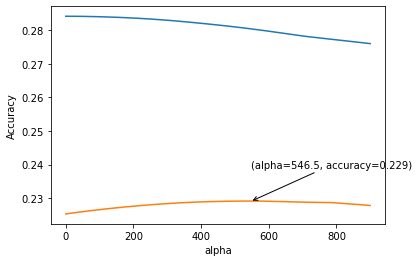

In [36]:
n_est = [x for x in np.arange(0.5, 900, 0.5)]
train_acc = [acc for acc in train_acc_dict.values()]
val_acc = [acc for acc in val_acc_dict.values()]

# viz
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(n_est, train_acc)
ax.plot(n_est, val_acc)
ax.set_xlabel('alpha')
ax.set_ylabel('Accuracy')
ax.annotate('(alpha=%s, accuracy=%s)' % (best_alpha, best_acc), xy=(best_alpha, best_acc), xytext=(best_alpha + 1, best_acc+0.01), arrowprops=dict(arrowstyle="->", facecolor='black'))

In [37]:
# Lasso test set error
best_lr = Lasso(random_state=123, alpha=best_alpha)
best_lr.fit(X_train_new, y_train)
best_lr.score(X_test_new, y_test)

0.2344892113270196

### 8. Extra digging into models/predictions

In [38]:
y_pred = best_lr.predict(X_test_new)
mae = mean_absolute_error(y_test, y_pred)
print('Lasso has MAE = £%sk' % (int(str(round(mae))[:-3])))

Lasso has MAE = £76k
